In [2]:
#Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [43]:
# Loading the data files
df_1 = pd.read_csv("mnt/data/reference.csv")
df_2 = pd.read_csv("mnt/data/analysis.csv")

# merging the analysis and reference files
df = pd.concat([df_1, df_2])

# printing the no.of rows and no.of columns
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

# converting the timestamp into date and adding the date column
df['date'] = pd.to_datetime(df['timestamp']).dt.date
df.head()

Number of rows:  90174
Number of columns:  7


,timestamp,time_since_login_min,transaction_amount,transaction_type,is_first_transaction,user_tenure_months,is_fraud,date
0,2018-01-01 00:00:00.000,1.561750,3981.1,PAYMENT,False,0.318980,1.0,2018-01-01
1,2018-01-01 00:08:43.152,1.658074,1267.9,PAYMENT,False,7.391323,0.0,2018-01-01
2,2018-01-01 00:17:26.304,2.454287,1984.7,CASH-IN,False,0.781225,1.0,2018-01-01
3,2018-01-01 00:26:09.456,2.392085,2265.2,CASH-OUT,False,0.680473,1.0,2018-01-01
4,2018-01-01 00:34:52.608,2.189806,2126.8,CASH-IN,False,8.542895,1.0,2018-01-01


In [41]:
# dropping the timestamp column
df = df.drop('timestamp', axis=1)

In [44]:
df.dtypes

timestamp                object
time_since_login_min    float64
transaction_amount      float64
transaction_type         object
is_first_transaction       bool
user_tenure_months      float64
is_fraud                float64
date                     object
dtype: object

In [21]:
# Checking for the missing values

x = df.isnull().sum().sum()
print("Total number of missing values: ", x)
df.isnull().sum()

Total number of missing values:  5505


time_since_login_min       0
transaction_amount         0
transaction_type        5505
is_first_transaction       0
user_tenure_months         0
is_fraud                   0
date                       0
dtype: int64

### Basic EDA Summary

In [22]:
# Fraud rate
df['is_fraud'].value_counts()

is_fraud
0.0    45124
1.0    45050
Name: count, dtype: int64

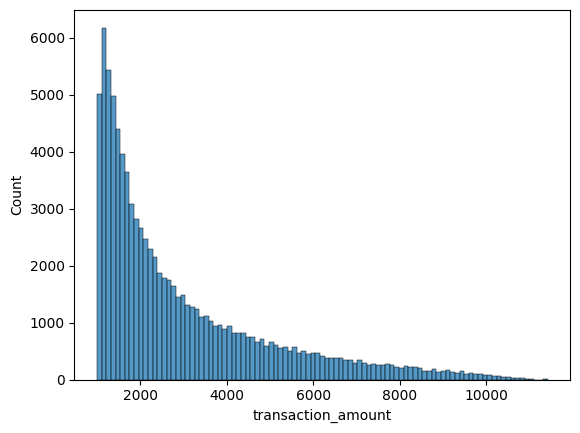

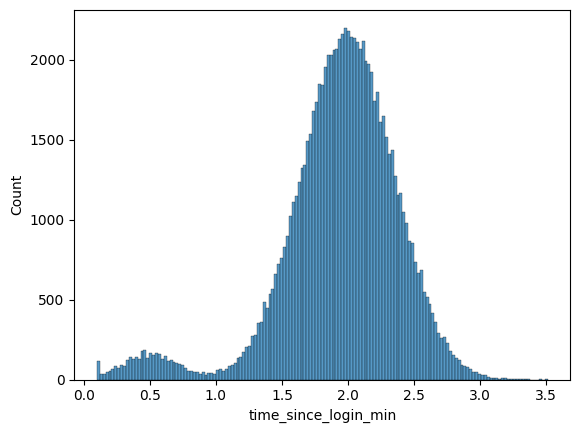

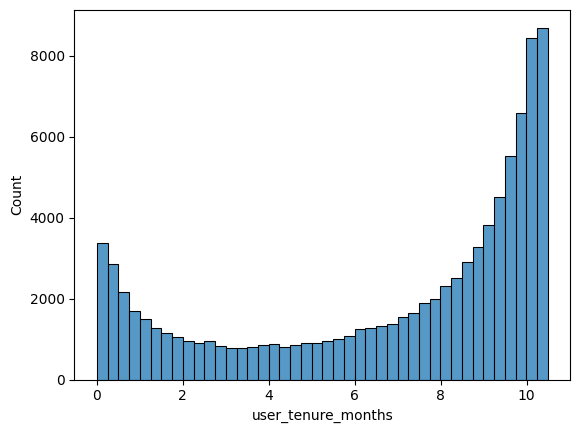

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of transaction amount
sns.histplot(df['transaction_amount'])
plt.show()

# Plotting the distribution of time_since_login_min
sns.histplot(df['time_since_login_min'])
plt.show()

#plotting the distribution of user_tenure_months
sns.histplot(df['user_tenure_months'])
plt.show()

In [27]:
# how transaction types as distributed
df['transaction_type'].value_counts()

transaction_type
PAYMENT     33988
CASH-IN     22524
CASH-OUT    22463
TRANSFER     5694
Name: count, dtype: int64

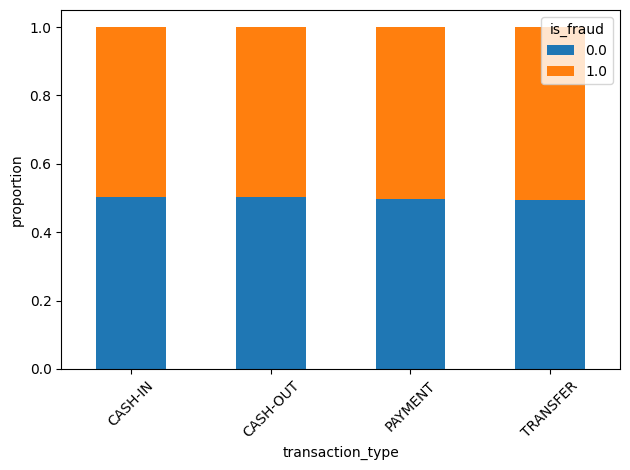

In [34]:
# Fraud rate by transaction_type
# proportions using crosstab (robust)
ct = pd.crosstab(df['transaction_type'], df['is_fraud'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.ylabel('proportion')
plt.tight_layout()
plt.show()


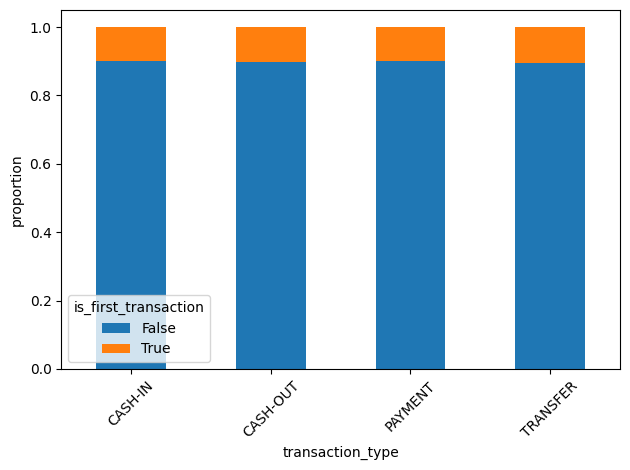

In [37]:
# Fraud rate by is_first_transaction
ct = pd.crosstab(df['transaction_type'], df['is_first_transaction'], normalize='index')
ct.plot(kind='bar', stacked=True)
plt.xticks(rotation=45)
plt.ylabel('proportion')
plt.tight_layout()
plt.show()

### EDA Summary — Day 1
- Loaded the data files successfully
- Concatenated both of the dfs i.e df_1 and df_2
- Converted 'timestamp' into 'date'
- There are 7 columns and 90174 rows
- Out of which 5505 transaction_type are missing
- Distribution of `transaction_amount` is RIGHT SKWED
- Distribution of `time_since_login_min` is almost normally distributed
- Distribution of `user_tenure_months` is LEFT SKWED
- There is no imbalance in the class